# Flow:

# personal experience data is what are the preferences/likes about what online shopping would be

# reviews data is what customer chooses/suggest for various shooping conditions based on the personal exp data in before columns

# So analysis should mainly be like for e.g. customers who are shopping for more than 4 years have suggested best visual website etc. No Need for Univariate analysis but just check if data is proper or not using distplot and countplot but focus on multivariate analysis.

# First, divide the columns from personal experience into utilitarian and hedonic values. --- Done

# clean the df_personal_experience - done


# then, create seperate datasets i.e. customers preferring utilitarian value vs customers preferring hedonic value.  -- tried, not possible 
E.g. ---> for each record index in df_coded(take whole dataset as you want don't want to mismatch choices with user): 
            for each util/hedon pref:
                util/hedon_user_df = df_coded[df_coded[utii_pref/hedonic_pref]] == 3 or 4 or 5:
                    
# We need to take each utilitarian and hedonic pref seperately and related to that pref find which question was asked and plot the outcomes.

In [1]:
import pdb

### Business Objective

Customer satisfaction is the key stimulant of purchases, repurchases and customer loyalty towards retailers. We need to analyse the factors that influence the online customers repeat purchase intentions. Both utilitarian value and hedonic value are to be considered for determining conclusions about the retailers.

### Loading necessary libraries

In [2]:
# to ignore warnings during program run
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Wrangling libraries
import pandas as pd
import numpy as np
import statistics

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

### Loading the dataset

In [4]:
pd.set_option('display.max_columns',None)

##### Normal dataset

In [5]:
df_norm = pd.read_excel('C:/Users/ashis/Downloads/Customer_retention_dataset--1-/Customer_retention_dataset/customer_retention_dataset.xlsx',sheet_name = 'datasheet')

##### Coded dataset

In [6]:
df_coded = pd.read_excel('C:/Users/ashis/Downloads/Customer_retention_dataset--1-/Customer_retention_dataset/customer_retention_dataset.xlsx',sheet_name = 'codedsheet')

### Check and clean the customer info and preferences dataset

In [7]:
df_personal_pref = pd.DataFrame(data = df_norm.iloc[:,0:47])

In [8]:
df_personal_pref.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5)
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5)

In [9]:
df_personal_pref.shape

(269, 47)

We have **269 records** of customer feedbacks which are gathered in the form of **47 independent features** which provide information about customer shopping preferrences.

In [10]:
for col in df_personal_pref.columns:
    if df_personal_pref[col].isnull().sum() != 0:
        print(col)

We **do not have any missing or null value** in our dataset of personal preferences of consumers.

#### We will divide the consumer's personal preferences into hedonic and utilitarian values.

In [11]:
hedonic_pref_features = ['22 Ease of navigation in website','23 Loading and processing speed','24 User friendly Interface of the website','27 Empathy (readiness to assist with queries) towards the customers','31 Enjoyment is derived from shopping online','32 Shopping online is convenient and flexible','34 Gaining access to loyalty programs is a benefit of shopping online','36 User derive satisfaction while shopping on a good quality website or application','37 Net Benefit derived from shopping online can lead to users satisfaction','38 User satisfaction cannot exist without trust','42 The Convenience of patronizing the online retailer','43 Shopping on the website gives you the sense of adventure','44 Shopping on your preferred e-tailer enhances your social status','45 You feel gratification shopping on your favorite e-tailer','46 Shopping on the website helps you fulfill certain roles',]

In [12]:
utilit_pref_features = ['18 The content on the website must be easy to read and understand','19 Information on similar product to the one highlighted  is important for product comparison','20 Complete information on listed seller and product being offered is important for purchase decision.','21 All relevant information on listed products must be stated clearly','25 Convenient Payment methods','26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time','28 Being able to guarantee the privacy of the customer','29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)','30 Online shopping gives monetary benefit and discounts','33 Return and replacement policy of the e-tailer is important for purchase decision','35 Displaying quality Information on the website improves satisfaction of customers','39 Offering a wide variety of listed product in several category','40 Provision of complete and relevant product information','41 Monetary savings','47 Getting value for money spent',]

#### Divide the customers into two categories based on their preferences are either hedonic or utilitarian

In [13]:
df_coded['18 The content on the website must be easy to read and understand'][1]

5

In [14]:
temp_index_list = []
temp_index_list.clear()

for i in range(len(df_coded.index)): # loop over all rows
    pref_values = []
    pref_values.clear()
    
    for column in utilit_pref_features: # loop over all utilitarian value column for each index
        # store all utilitarian values 
        pref_values.append(df_coded[column][i])
    if statistics.mode(pref_values) > 3:
            temp_index_list.append(i)

In [15]:
len(temp_index_list)

257

In [16]:
temp_index_list = []
temp_index_list.clear()

for i in range(len(df_coded.index)): # loop over all rows
    pref_values = []
    pref_values.clear()
    
    for column in hedonic_pref_features: # loop over all utilitarian value column for each index
        # store all utilitarian values 
        pref_values.append(df_coded[column][i])
    if statistics.mode(pref_values) > 3:
            temp_index_list.append(i)

In [17]:
len(temp_index_list)

246

#### We won't be able to divide the user's based on their preferences are mostly utilitarian or mostly hedonic

### Check and clean the consumer's choices dataset

In [18]:
df_choices = pd.DataFrame(data = df_norm.iloc[:,47:])

In [19]:
df_choices.head()

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com",Myntra.com,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com",Paytm.com,"Amazon.in, Myntra.com","Amazon.in, Myntra.com","Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [20]:
df_choices.shape

(269, 24)

We have **269 records** of online shopping consumer's **recommended choices of retailers** divided into **24 different target features of online shopping experience**.

In [21]:
for col in df_choices.columns:
    if df_choices[col].isnull().sum() != 0:
        print(col)

We **do not have any missing values** in our dataset.

#### We will divide the various online shopping experiences features by their appealing nature to hedonic vs utilitarian values.

In [22]:
utilit_appeal_features = ['Wild variety of product on offer','Complete, relevant description information of products','Reliability of the website or application','Availability of several payment options','Speedy order delivery','Privacy of customers’ information','Security of customer financial information','Perceived Trustworthiness','Presence of online assistance through multi-channel','Limited mode of payment on most products (promotion, sales period)','Longer delivery period']

In [23]:
hedonic_appeal_features = ['Easy to use website or application','Visual appealing web-page layout','Fast loading website speed of website and application','Quickness to complete purchase','Longer time to get logged in (promotion, sales period)','Longer time in displaying graphics and photos (promotion, sales period)','Late declaration of price (promotion, sales period','Longer page loading time (promotion, sales period)','Change in website/Application design','Frequent disruption when moving from one page to another','Website is as efficient as before']

#### Function to plot %ge on bar plots Without hue

In [24]:
def without_hue(df):
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 1.5 - 0.2
        y = p.get_height() + 1
        ax.annotate(percentage, (x,y) , size = 12)

### EDA of online shopper's personal preferences dataset

In [25]:
list_cols = df_personal_pref.columns

In [26]:
list_cols[0]

'1Gender of respondent'

#### 1. Gender of respondent

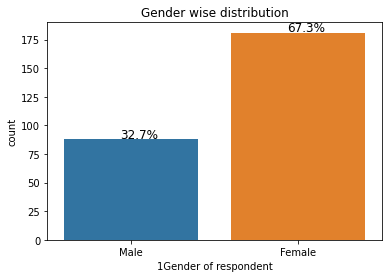

In [27]:
# plt.figure(figsize=(7,7))
ax = sn.countplot(df_personal_pref['1Gender of respondent'])
plt.title("Gender wise distribution")
without_hue(df_personal_pref)  
plt.show()

As 67% of our database has female opinions, our analysis might be a little bit biased towards popular features amongst female customers while shopping online.

In [28]:
list_cols[1]

'2 How old are you? '

#### 2. Age of respondent

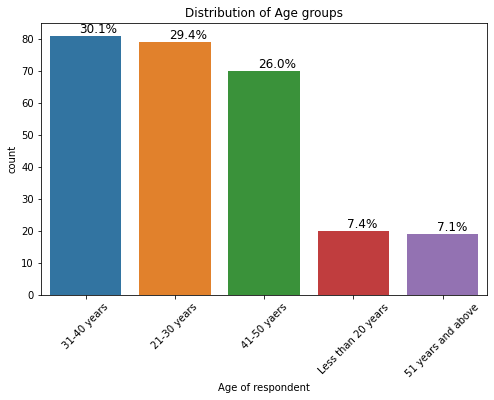

In [29]:
plt.figure(figsize=(8,5))
ax = sn.countplot(df_personal_pref['2 How old are you? '])   
plt.title("Distribution of Age groups")
plt.xticks(rotation='45')
plt.xlabel("Age of respondent")
without_hue(df_personal_pref)
plt.show()

In our dataset, we have **30% feedbacks from people of age group of 31-40 yrs and 21-30 yrs**. We have **26% feedbacks from people of age group 41-50 yrs** while we have **only 7% records for people of age more than 51 yrs**.

In [30]:
list_cols[2]

'3 Which city do you shop online from?'

#### 3. City of residence

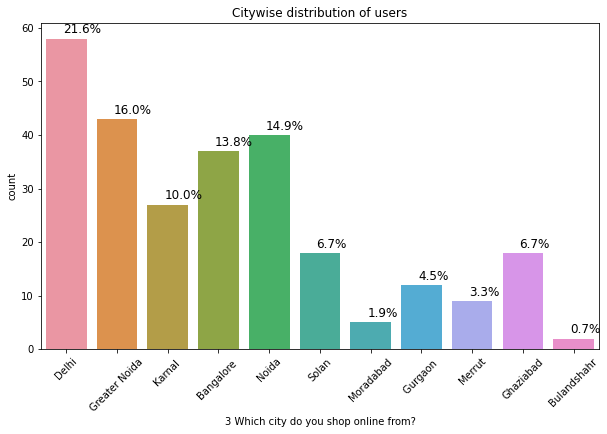

In [31]:
plt.figure(figsize=(10,6))
ax = sn.countplot(df_personal_pref['3 Which city do you shop online from?'])
without_hue(df_personal_pref)
plt.title('Citywise distribution of users')
plt.xticks(rotation='45')
plt.show()

We have more than 50% of records of users who shop online from Delhi and Noida region, we have less than 10% records available for people from not metro cities.

In [32]:
list_cols[3]

'4 What is the Pin Code of where you shop online from?'

#### 4. Pincode used while shopping ?

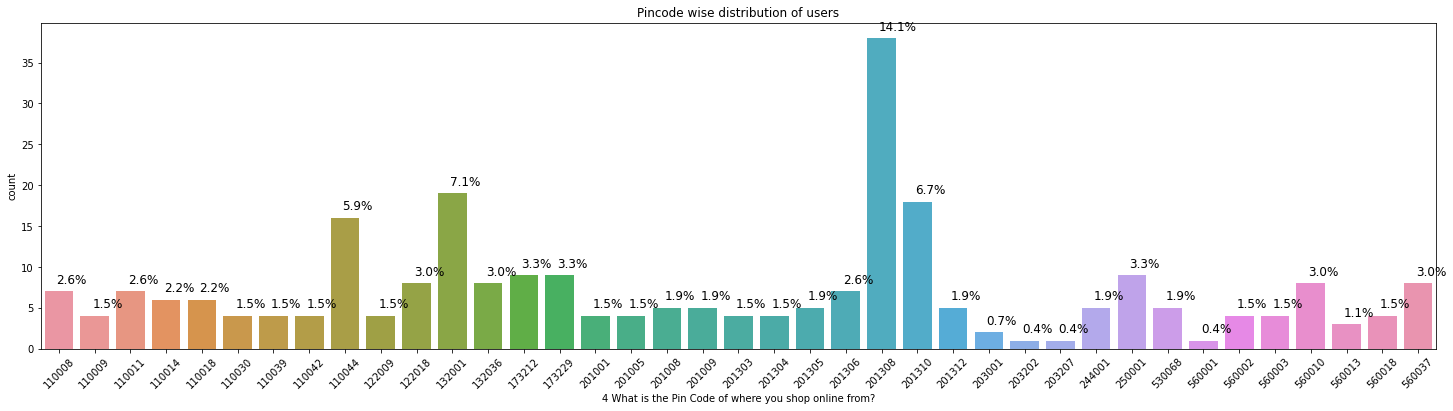

In [33]:
plt.figure(figsize=(25,6))
ax = sn.countplot(df_personal_pref['4 What is the Pin Code of where you shop online from?'])
plt.xticks(rotation='45')
without_hue(df_personal_pref)
plt.title('Pincode wise distribution of users')
plt.show()

We have **most of the data of user feedbacks from Noida (201308,201310) , Karnal (132001) , Delhi (1100xx) region**, so our analysis will be a little biased towards the North Indian customer's perspective.

In [34]:
list_cols[4]

'5 Since How Long You are Shopping Online ?'

#### 5. Online shopping experience in years

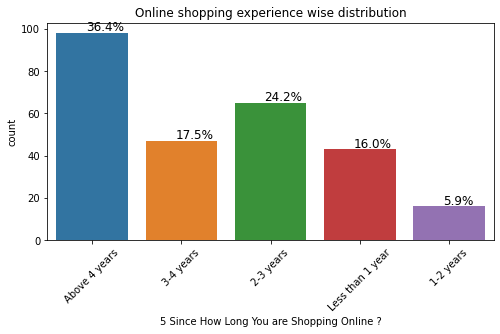

In [35]:
plt.figure(figsize=(8,4))
ax = sn.countplot(df_personal_pref['5 Since How Long You are Shopping Online ?'])
without_hue(df_personal_pref)
plt.title('Online shopping experience wise distribution')
plt.xticks(rotation='45')
plt.show()

We have **36% feedbacks of users who are shopping online for more than 4 years**, while we have **24% records of people shopping online for 2-3 years** and about **17% records for each 3-4 years experienced and less than 1 year shoppers**.

In [36]:
list_cols[5]

'6 How many times you have made an online purchase in the past 1 year?'

#### 6. Frequency of purchase in past 1 year.

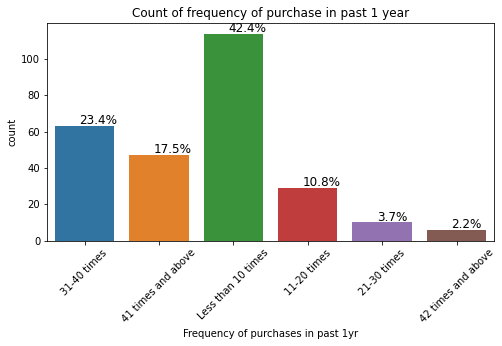

In [37]:
plt.figure(figsize=(8,4))
ax = sn.countplot(df_personal_pref['6 How many times you have made an online purchase in the past 1 year?'])
without_hue(df_personal_pref)
plt.title('Count of frequency of purchase in past 1 year')
plt.xlabel('Frequency of purchases in past 1yr')
plt.xticks(rotation='45')
plt.show()

In our dataset, we have **42% of users who have purchased less than 10 times in past 1 year** which is higher than any other shopping frequency. We have **23% of data of users who have purchased 31-40 times** in past year while we have **17% of feedbacks from users who repurchased online 41 or more time**. 

We have **only 2% of records of users who purchased in the past 1 year 42 times or more.**

In [38]:
list_cols[6]

'7 How do you access the internet while shopping on-line?'

#### 7. How do you access the internet while shopping on-line?

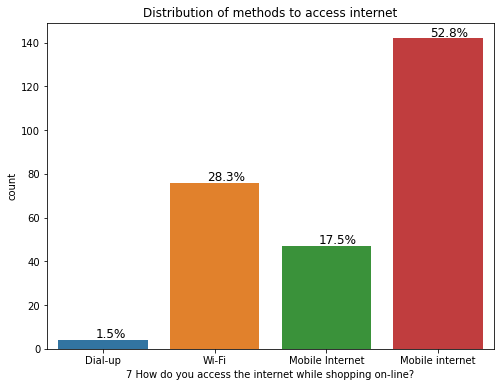

In [39]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['7 How do you access the internet while shopping on-line?'])
without_hue(df_personal_pref)
plt.title('Distribution of methods to access internet')
# plt.xlabel('Frequency of purchases in past 1yr')
# plt.xticks(rotation='45')
plt.show()

More than 68% of consumers in our dataset use mobile internet to shopping online, while 28% use Wi-fi access.

In [40]:
list_cols[7]

'8 Which device do you use to access the online shopping?'

#### 8. Which device do you use to access the online shopping?

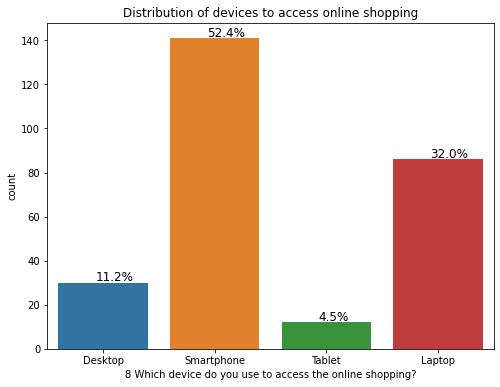

In [41]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['8 Which device do you use to access the online shopping?'])
without_hue(df_personal_pref)
plt.title('Distribution of devices to access online shopping')
# plt.xlabel('Frequency of purchases in past 1yr')
# plt.xticks(rotation='45')
plt.show()

We observe in our dataset that more than 50% of reviewers have used Smartphone , after which Laptop is more used with 32% of the records. 

In [42]:
list_cols[8]

'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '

#### 9.What is the screen size of your mobile device?

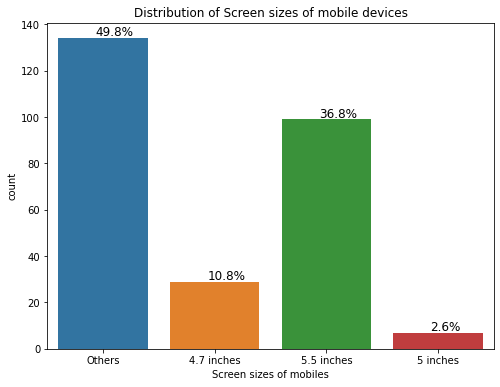

In [43]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '])
without_hue(df_personal_pref)
plt.title('Distribution of Screen sizes of mobile devices')
plt.xlabel('Screen sizes of mobiles')
# plt.xticks(rotation='45')
plt.show()

We do not have actual screen size of mobile used for almost 50% of the data, so this feature is not useful. However, we observe, in our dataset, 36% of the reviewers had 5.5 inches screen mobile, while 10% had 4.7 inch screen mobile.

In [44]:
list_cols[9]

'10 What is the operating system (OS) of your device?\t\t\t\t                                          '

#### 10.What is the operating system (OS) of your device?

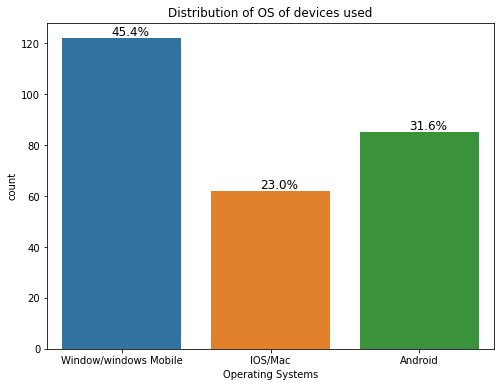

In [45]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['10 What is the operating system (OS) of your device?\t\t\t\t                                          '])
without_hue(df_personal_pref)
plt.title('Distribution of OS of devices used')
plt.xlabel('Operating Systems')
# plt.xticks(rotation='45')
plt.show()

We observe that 45% of the reviewers had shopped with devices built on Windows/Windows Mobiles , while 31% reviewers had used Android devices. We have very few data of people who use IOS/Mac devices.

In [46]:
list_cols[10]

'11 What browser do you run on your device to access the website?\t\t\t                                                          '

#### 11.What browser do you run on your device to access the website?

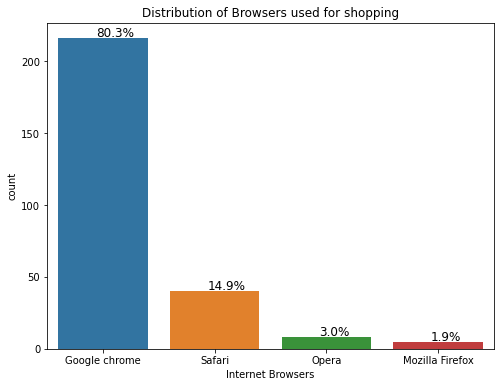

In [47]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['11 What browser do you run on your device to access the website?\t\t\t                                                          '])
without_hue(df_personal_pref)
plt.title('Distribution of Browsers used for shopping')
plt.xlabel('Internet Browsers')
# plt.xticks(rotation='45')
plt.show()

We observe that Google chrome is used by 80% of the consumers from our dataset for shopping online. We have very few feedback data available for consumers who use Safari or Opera or Mozilla Firefox. So this feature is not very helpful to us.

In [48]:
list_cols[11]

'12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '

#### 12.Which channel did you follow to arrive at your favorite online store for the first time?

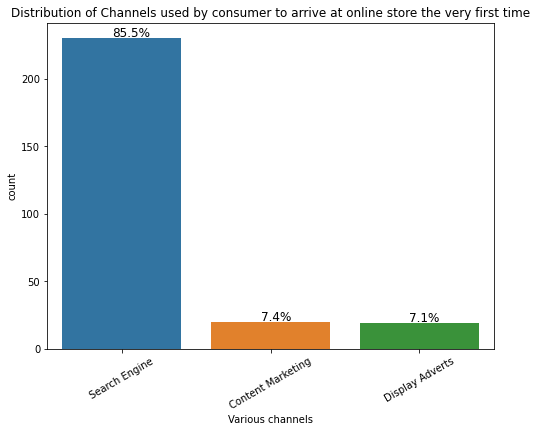

In [49]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '])
without_hue(df_personal_pref)
plt.title('Distribution of Channels used by consumer to arrive at online store the very first time')
plt.xlabel('Various channels')
plt.xticks(rotation='30')
plt.show()

We observe from our dataset, that very few consumers have visited online shopping websites for the first time after watching an advertisement or through content marketing channels. More than 85% of people have visited online retailers through search engines only.

In [50]:
list_cols[12]

'13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '

#### 13. After first visit, how do you reach the online retail store?

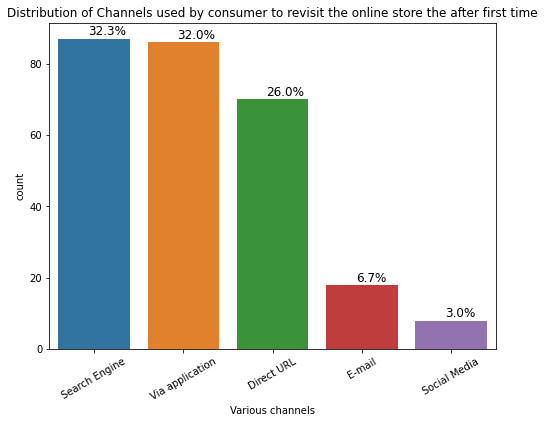

In [51]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '])
without_hue(df_personal_pref)
plt.title('Distribution of Channels used by consumer to revisit the online store the after first time')
plt.xlabel('Various channels')
plt.xticks(rotation='30')
plt.show()

We observe decrease in the % ge of consumers revisiting the shopping website after first time via Search Engines. We observe only 32% of people have continued using Search Engine, however we observe 32% of the people use retailer's application to shop next time. We have 26% of records of people who use Direct Url to visit the retailer next time.

In [52]:
list_cols[13]

'14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '

#### 14.How much time do you explore the e- retail store before making a purchase decision?

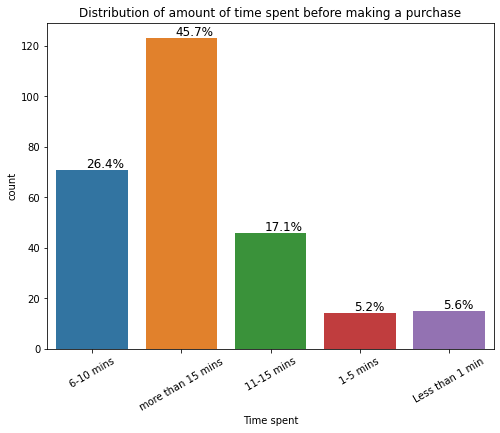

In [53]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '])
without_hue(df_personal_pref)
plt.title('Distribution of amount of time spent before making a purchase')
plt.xlabel('Time spent')
plt.xticks(rotation='30')
plt.show()

We observe that most of the consumers take more than 10-15 minutes to make a purchase decision. 26% of the consumers take 6-10 mins before finalising on purchase decision.

In [54]:
list_cols[14]

'15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '

#### 15. What is your preferred payment Option?

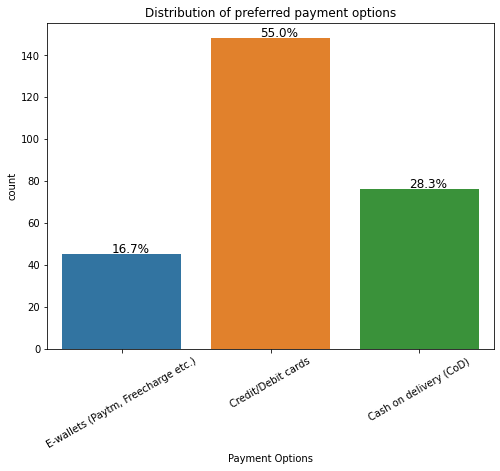

In [55]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '])
without_hue(df_personal_pref)
plt.title('Distribution of preferred payment options')
plt.xlabel('Payment Options')
plt.xticks(rotation='30')
plt.show()

From our dataset, we observe that Credit/Debit card payments are most preferred mode of payment, while 28% of the reviewers had opted for Cash on Delivery mode. E-wallet payments are only 16% recorded in our dataset

In [56]:
list_cols[15]

'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '

#### 16. How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?

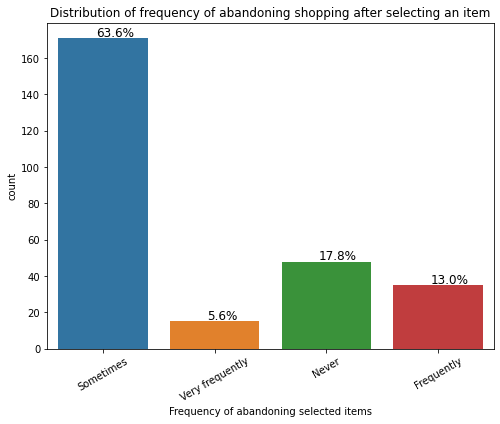

In [57]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '])
without_hue(df_personal_pref)
plt.title('Distribution of frequency of abandoning shopping after selecting an item')
plt.xlabel('Frequency of abandoning selected items')
plt.xticks(rotation='30')
plt.show()

In our dataset, we observe that 63% of people said they sometimes abandon purchasing a product , while 17% of people never abandon purchasing a product after selecting it. Very few 5.6% reviewers very frequently abandon shopping.

In [58]:
list_cols[16]

'17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '

#### 17. Why did you abandon the “Bag”, “Shopping Cart”?

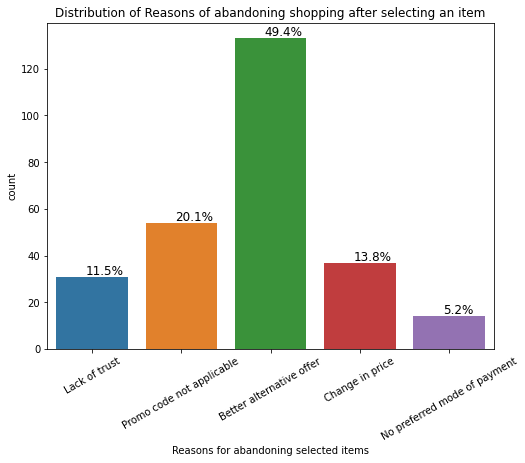

In [59]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '])
without_hue(df_personal_pref)
plt.title('Distribution of Reasons of abandoning shopping after selecting an item')
plt.xlabel('Reasons for abandoning selected items')
plt.xticks(rotation='30')
plt.show()

From our dataset we observe that the most common reason to abandon selected shopping item is better alternative offer. After that, promo code not getting applied is the reason given by 20% of consumers to abandon shopping.

In [60]:
list_cols[17]

'18 The content on the website must be easy to read and understand'

#### 18. The content on the website must be easy to read and understand

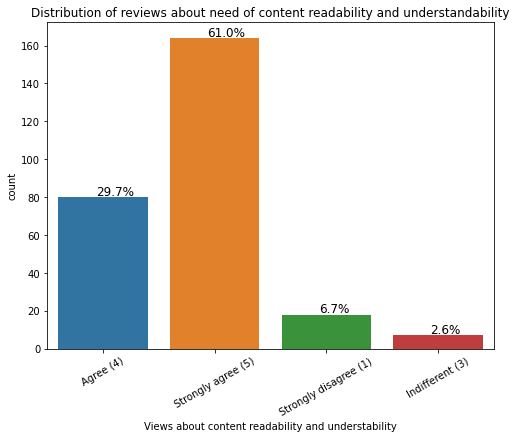

In [61]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['18 The content on the website must be easy to read and understand'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of content readability and understandability')
plt.xlabel('Views about content readability and understability')
plt.xticks(rotation='30')
plt.show()

We observe that, 61% people strongly agree that content on the website should be easy to read and understand, very few 7% people strongly disagree.

In [62]:
list_cols[18]

'19 Information on similar product to the one highlighted  is important for product comparison'

#### 19. Information on similar product to the one highlighted  is important for product comparison

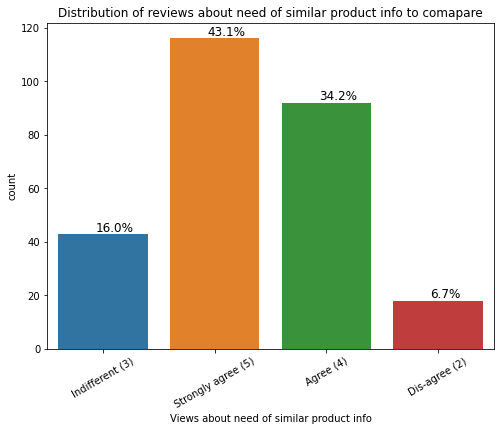

In [63]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['19 Information on similar product to the one highlighted  is important for product comparison'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of similar product info to comapare')
plt.xlabel('Views about need of similar product info')
plt.xticks(rotation='30')
plt.show()

In [64]:
list_cols[19]

'20 Complete information on listed seller and product being offered is important for purchase decision.'

#### 20. Complete information on listed seller and product being offered is important for purchase decision.

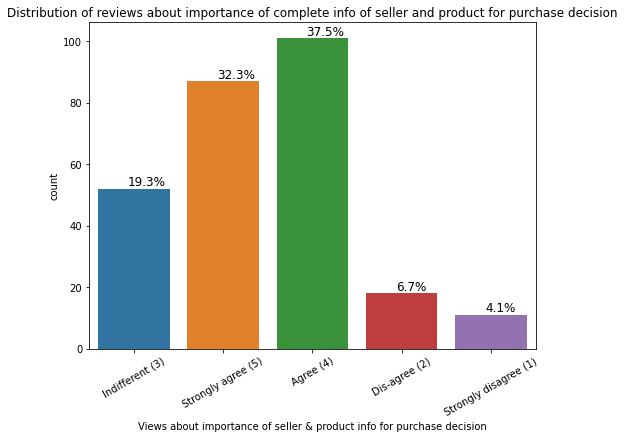

In [65]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['20 Complete information on listed seller and product being offered is important for purchase decision.'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about importance of complete info of seller and product for purchase decision')
plt.xlabel('Views about importance of seller & product info for purchase decision')
plt.xticks(rotation='30')
plt.show()

As expected, we observe more than 60% of people agree that complete information of listed seller and the product is important to make purchase decision.

In [66]:
list_cols[20]

'21 All relevant information on listed products must be stated clearly'

#### 21. All relevant information on listed products must be stated clearly

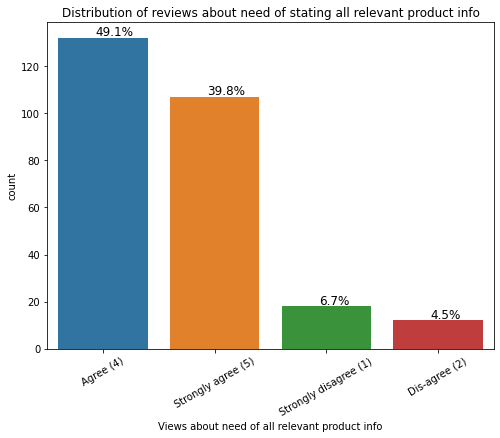

In [67]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['21 All relevant information on listed products must be stated clearly'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of stating all relevant product info')
plt.xlabel('Views about need of all relevant product info')
plt.xticks(rotation='30')
plt.show()

We observe that around 80% people have agreed about the need of having all relevant product information stated clearly.

In [68]:
list_cols[21]

'22 Ease of navigation in website'

#### 22. Ease of navigation in website

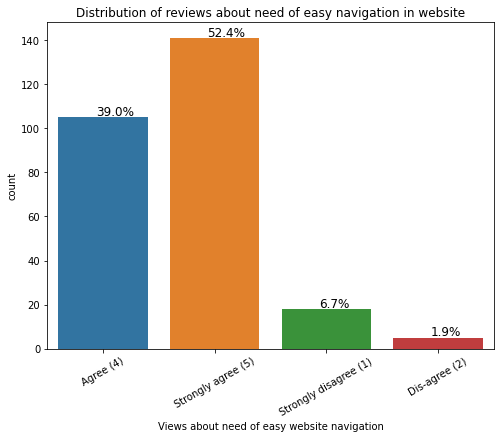

In [69]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['22 Ease of navigation in website'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of easy navigation in website')
plt.xlabel('Views about need of easy website navigation')
plt.xticks(rotation='30')
plt.show()

More than 90% people in our dataset have agreed about need of ease in website navigation.

In [70]:
list_cols[22]

'23 Loading and processing speed'

#### 23. Loading and processing speed

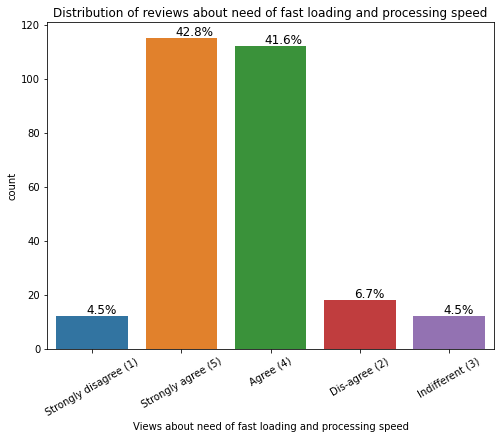

In [71]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['23 Loading and processing speed'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of fast loading and processing speed')
plt.xlabel('Views about need of fast loading and processing speed')
plt.xticks(rotation='30')
plt.show()

Around 80% of people in our dataset has agreed that fast loading and processing speed is necessary for better experience of online shopping.

In [72]:
list_cols[23]

'24 User friendly Interface of the website'

#### 24. User friendly Interface of the website

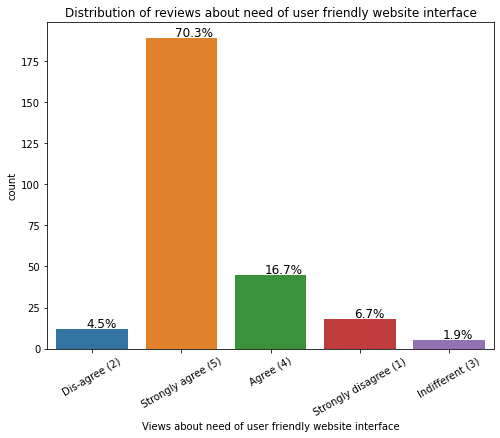

In [73]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['24 User friendly Interface of the website'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of user friendly website interface')
plt.xlabel('Views about need of user friendly website interface')
plt.xticks(rotation='30')
plt.show()

More than 70% reviewers in our dataset strongly agree about the need of user friendly website interface.

In [74]:
list_cols[24]

'25 Convenient Payment methods'

#### 25. Convenient Payment methods

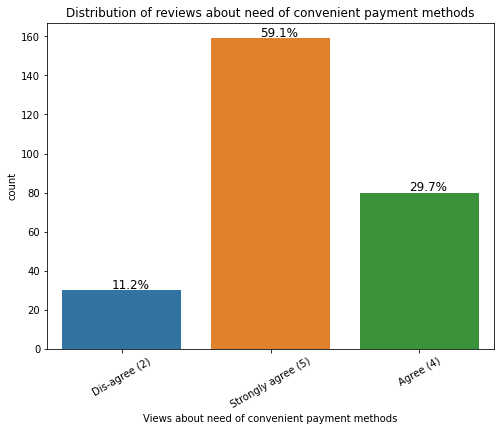

In [75]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['25 Convenient Payment methods'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of convenient payment methods')
plt.xlabel('Views about need of convenient payment methods')
plt.xticks(rotation='30')
plt.show()

From our records, we observe that 60% people have strongly agreed while 29% people agree about need of convenient payment methods. However, 11% of the records show dis-agreement about need of convenient payment methods while shopping online.

In [76]:
list_cols[25]

'26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'

#### 26. Trust that the online retail store will fulfill its part of the transaction at the stipulated time

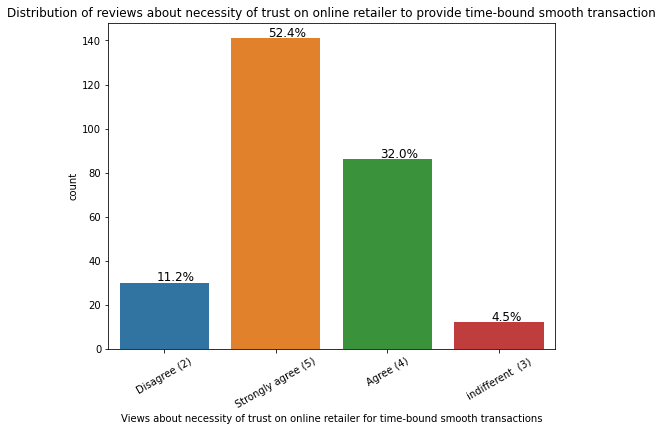

In [77]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about necessity of trust on online retailer to provide time-bound smooth transaction')
plt.xlabel('Views about necessity of trust on online retailer for time-bound smooth transactions')
plt.xticks(rotation='30')
plt.show()

In [78]:
list_cols[26]

'27 Empathy (readiness to assist with queries) towards the customers'

#### 27. Empathy (readiness to assist with queries) towards the customers

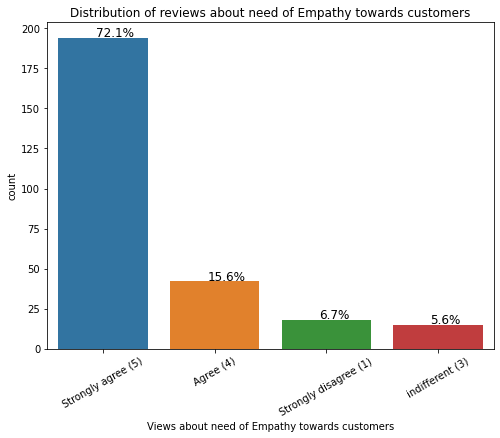

In [79]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['27 Empathy (readiness to assist with queries) towards the customers'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of Empathy towards customers')
plt.xlabel('Views about need of Empathy towards customers')
plt.xticks(rotation='30')
plt.show()

We observe that more than 85% people agree that customer care services of online retailers should have empathy towards complaining customers.

In [80]:
list_cols[27]

'28 Being able to guarantee the privacy of the customer'

#### 28. Being able to guarantee the privacy of the customer

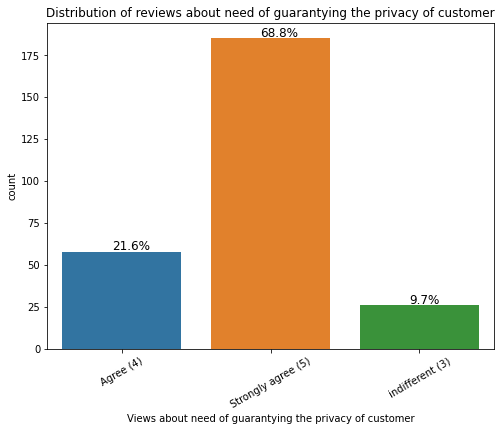

In [81]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['28 Being able to guarantee the privacy of the customer'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of guarantying the privacy of customer')
plt.xlabel('Views about need of guarantying the privacy of customer')
plt.xticks(rotation='30')
plt.show()

We observe that 69% people strongly agree that retailer should guarantee the privacy of customer while very few 9% people have indifferent view about guarantying the privacy of customer.

In [82]:
list_cols[28]

'29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'

#### 29. Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

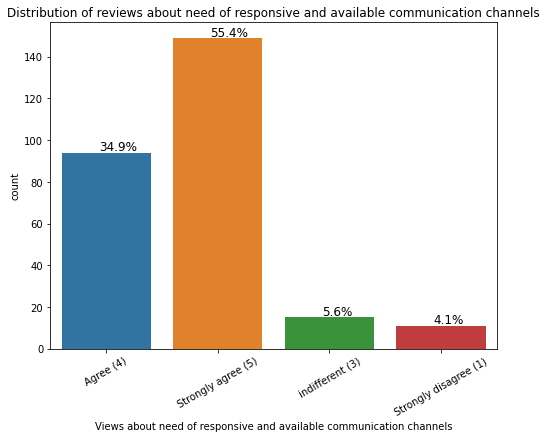

In [83]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of responsive and available communication channels')
plt.xlabel('Views about need of responsive and available communication channels')
plt.xticks(rotation='30')
plt.show()

We observe that, 80% people agree that the communication channels of online retailers should be responsive and available and is the important factor while shopping. Less than 6% people are indifferent in their opinions about the need of responsive communication channels.

In [84]:
list_cols[29]

'30 Online shopping gives monetary benefit and discounts'

#### 30. Online shopping gives monetary benefit and discounts

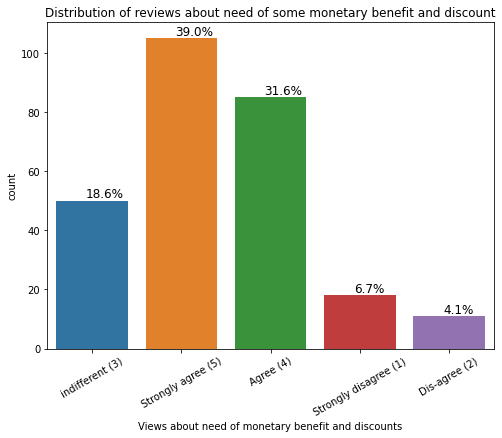

In [85]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['30 Online shopping gives monetary benefit and discounts'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of some monetary benefit and discount')
plt.xlabel('Views about need of monetary benefit and discounts')
plt.xticks(rotation='30')
plt.show()

39% of reviewers from our dataset strongly agree that online shopping should have monetary benefits and discounts, while 6.7% strongly disagree about need of monetary benefits and discounts while shopping online.

In [86]:
list_cols[30]

'31 Enjoyment is derived from shopping online'

#### 31. Enjoyment is derived from shopping online

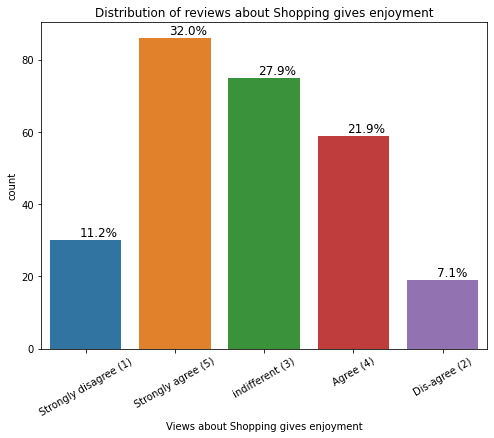

In [87]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['31 Enjoyment is derived from shopping online'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about Shopping gives enjoyment')
plt.xlabel('Views about Shopping gives enjoyment')
plt.xticks(rotation='30')
plt.show()

We observe 32% people are strongly agree that they derive enjoyment from shopping online, while 27% of the people are indifferent to the thought of deriving enjoyment from shopping online.

In [88]:
list_cols[31]

'32 Shopping online is convenient and flexible'

#### 32. Shopping online is convenient and flexible

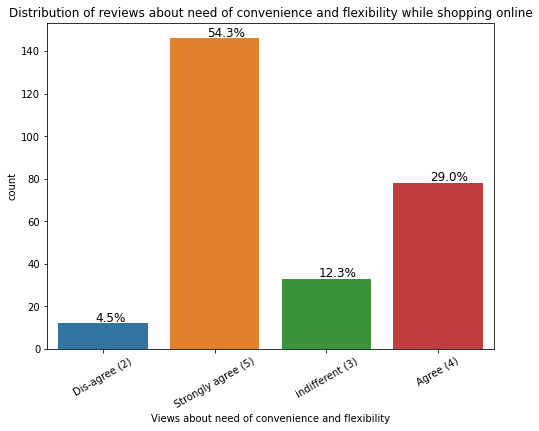

In [89]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['32 Shopping online is convenient and flexible'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of convenience and flexibility while shopping online')
plt.xlabel('Views about need of convenience and flexibility')
plt.xticks(rotation='30')
plt.show()

We observe more than 84% of the people agree about having convenient and flexible shopping experience is important while 12% people feel indifferent towards importance of convenience and flexibility while shopping online.

In [90]:
list_cols[32]

'33 Return and replacement policy of the e-tailer is important for purchase decision'

#### 33. Return and replacement policy of the e-tailer is important for purchase decision

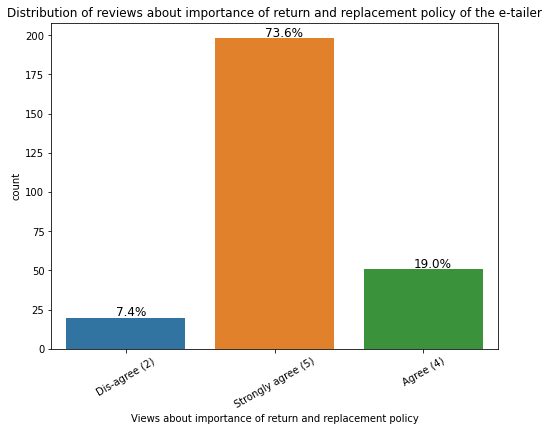

In [91]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['33 Return and replacement policy of the e-tailer is important for purchase decision'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about importance of return and replacement policy of the e-tailer')
plt.xlabel('Views about importance of return and replacement policy')
plt.xticks(rotation='30')
plt.show()

We observe in our dataset that 73% people strongly agree that Return and Replacement policy of the e-tailers is very important while making purchasing decisions, while 19% people agree with it. However, 7.4% people disagreed that the return and replacement policy is not so important for making online shopping purchase.

In [92]:
list_cols[33]

'34 Gaining access to loyalty programs is a benefit of shopping online'

#### 34. Gaining access to loyalty programs is a benefit of shopping online

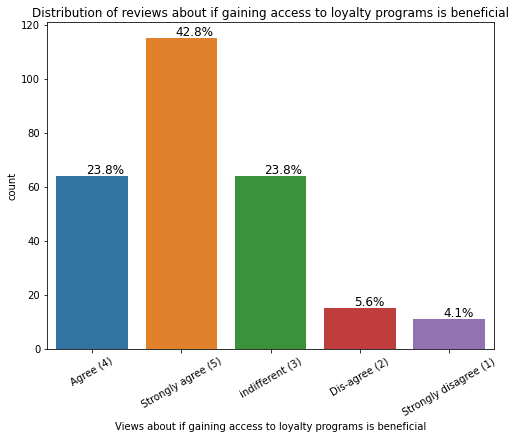

In [93]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['34 Gaining access to loyalty programs is a benefit of shopping online'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about if gaining access to loyalty programs is beneficial')
plt.xlabel('Views about if gaining access to loyalty programs is beneficial')
plt.xticks(rotation='30')
plt.show()

We observe that 43% of the people strongly agree that gaining access to loyalty programs is benefit of online shopping and 24% agree with that fact. However, 4.1% of the people strongly disagree that gaining access to loyalty programs is beneficial and 6% people agree that loyalty programs are not beneficial. 24% people have indifferent opinion about loyalty programs. 

In [94]:
list_cols[34]

'35 Displaying quality Information on the website improves satisfaction of customers'

#### 35. Displaying quality Information on the website improves satisfaction of customers

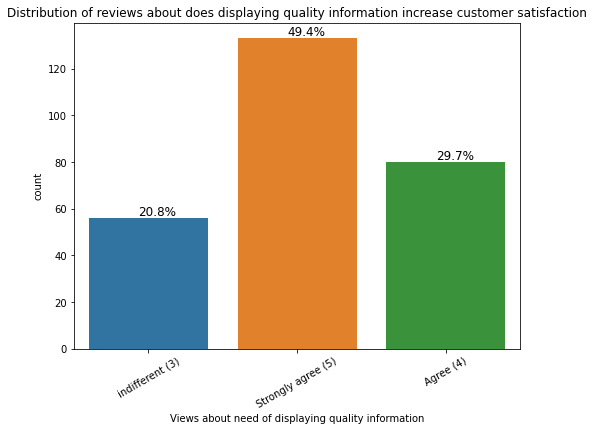

In [95]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['35 Displaying quality Information on the website improves satisfaction of customers'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about does displaying quality information increase customer satisfaction')
plt.xlabel('Views about need of displaying quality information')
plt.xticks(rotation='30')
plt.show()

50% people strongly agree and 30% people agree that displaying quality information on the website improves customer satisfaction. While rest 20% feel indifferent towards importance of displaying quality information while making online purchase.

In [96]:
list_cols[35]

'36 User derive satisfaction while shopping on a good quality website or application'

#### 36. User derive satisfaction while shopping on a good quality website or application

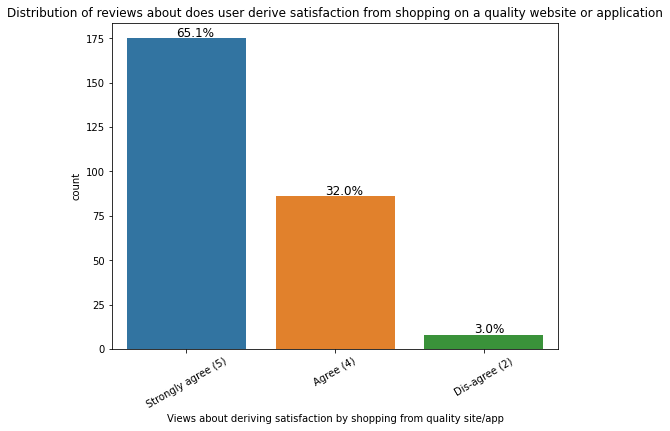

In [97]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['36 User derive satisfaction while shopping on a good quality website or application'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about does user derive satisfaction from shopping on a quality website or application')
plt.xlabel('Views about deriving satisfaction by shopping from quality site/app')
plt.xticks(rotation='30')
plt.show()

65% people have strongly agreed while 32% people agree that shopping from a good quality website or app derives satisfaction in their life while 3% disagree with it.

In [98]:
list_cols[36]

'37 Net Benefit derived from shopping online can lead to users satisfaction'

#### 37. Net Benefit derived from shopping online can lead to users satisfaction

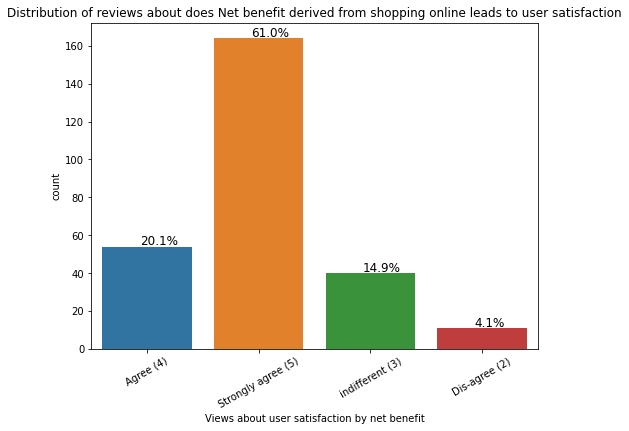

In [99]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['37 Net Benefit derived from shopping online can lead to users satisfaction'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about does Net benefit derived from shopping online leads to user satisfaction')
plt.xlabel('Views about user satisfaction by net benefit')
plt.xticks(rotation='30')
plt.show()

We observe that 61% strongly agree and 20% people agree thay net benefit derived from shopping online leads to user satisfaction while 15% are indifferent to the thought. However , 4% of the people in our dataset disagree about deriving user satisfaction through net benefits acquired via online shopping.

In [100]:
list_cols[37]

'38 User satisfaction cannot exist without trust'

#### 38. User satisfaction cannot exist without trust

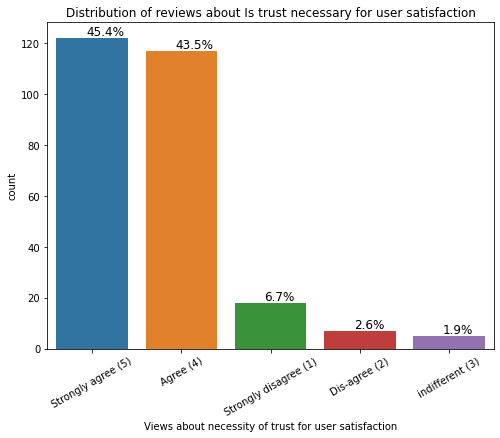

In [101]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['38 User satisfaction cannot exist without trust'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about Is trust necessary for user satisfaction')
plt.xlabel('Views about necessity of trust for user satisfaction')
plt.xticks(rotation='30')
plt.show()

We observe that 45% strongly agree and 44% agree that trust is essential for user satisfaction while 7% stongly disagree with it and 3% disagree with it.

In [102]:
list_cols[38]

'39 Offering a wide variety of listed product in several category'

#### 39. Offering a wide variety of listed product in several category

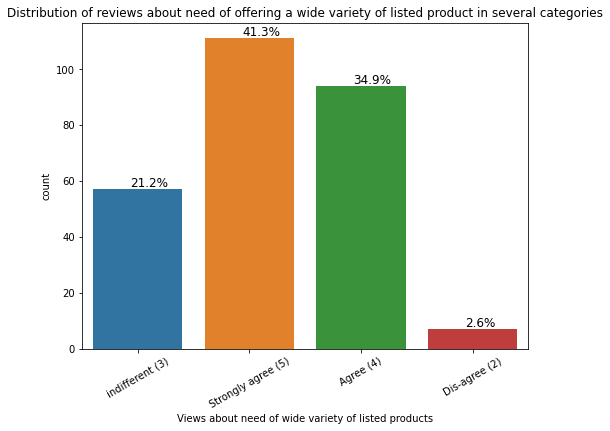

In [103]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['39 Offering a wide variety of listed product in several category'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of offering a wide variety of listed product in several categories')
plt.xlabel('Views about need of wide variety of listed products')
plt.xticks(rotation='30')
plt.show()

We observe from our dataset that, 41% people strongly agree while 35% agree that wide variety of product in several categories is important for them. However only 2.6% people disagree with it and for 21% of the people it doesn't matter as much.

In [104]:
list_cols[39]

'40 Provision of complete and relevant product information'

#### 40. Provision of complete and relevant product information

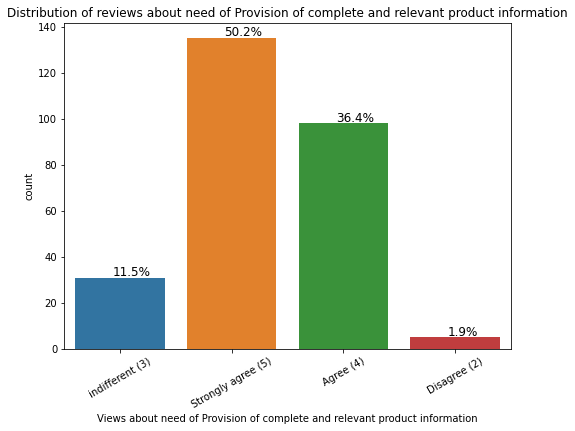

In [105]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['40 Provision of complete and relevant product information'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of Provision of complete and relevant product information')
plt.xlabel('Views about need of Provision of complete and relevant product information')
plt.xticks(rotation='30')
plt.show()

We observe that 50% people strongly agree and 36% agree that provision of complete and relevant product information is important while shopiing online.

In [106]:
list_cols[40]

'41 Monetary savings'

#### 41. Monetary savings

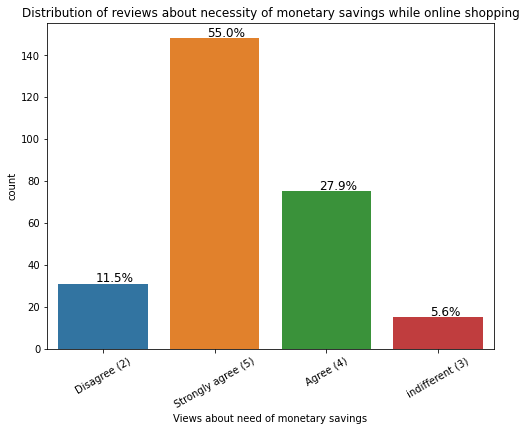

In [107]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['41 Monetary savings'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about necessity of monetary savings while online shopping')
plt.xlabel('Views about need of monetary savings')
plt.xticks(rotation='30')
plt.show()

55% people have strongly agreed that monetary savings is important factor while shopping online and 28% people agree with it. 11% people don't give much importance to monetary savings while shopping online.

In [108]:
list_cols[41]

'42 The Convenience of patronizing the online retailer'

#### 42. The Convenience of patronizing the online retailer

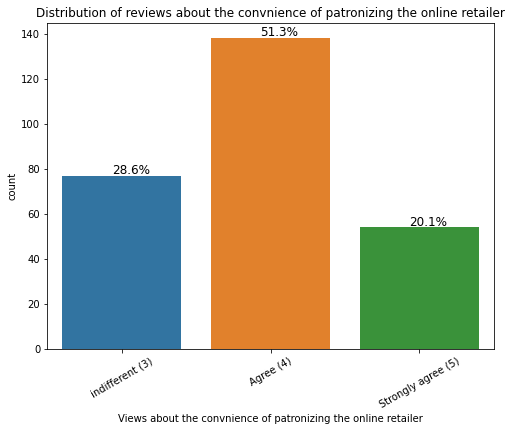

In [109]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['42 The Convenience of patronizing the online retailer'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about the convnience of patronizing the online retailer')
plt.xlabel('Views about the convnience of patronizing the online retailer')
plt.xticks(rotation='30')
plt.show()

In [110]:
list_cols[42]

'43 Shopping on the website gives you the sense of adventure'

#### 43. Shopping on the website gives you the sense of adventure

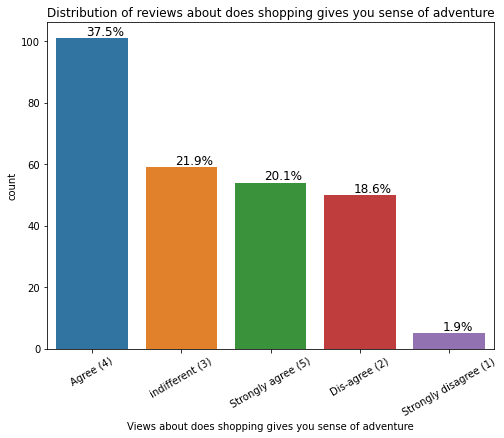

In [111]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['43 Shopping on the website gives you the sense of adventure'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about does shopping gives you sense of adventure')
plt.xlabel('Views about does shopping gives you sense of adventure')
plt.xticks(rotation='30')
plt.show()

We observe that 38% of people agree that they get sense of adventure from shopping online.

In [112]:
list_cols[43]

'44 Shopping on your preferred e-tailer enhances your social status'

#### 44. Shopping on your preferred e-tailer enhances your social status

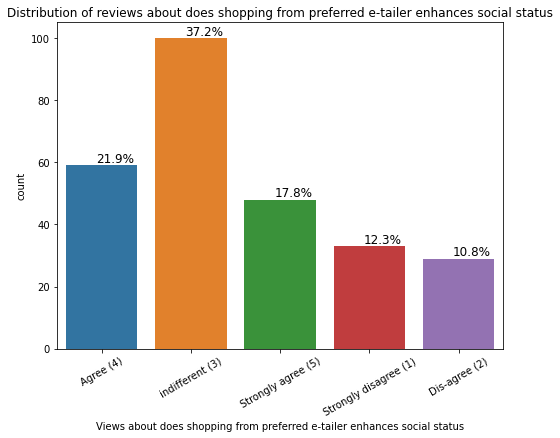

In [113]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['44 Shopping on your preferred e-tailer enhances your social status'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about does shopping from preferred e-tailer enhances social status')
plt.xlabel('Views about does shopping from preferred e-tailer enhances social status')
plt.xticks(rotation='30')
plt.show()

37% of people from our dataset feel indifferent towards the view that shopping from preferred e-tailer enhances social status, while 21% agree with it. We observe 17% people strongly agree with it.

In [114]:
list_cols[44]

'45 You feel gratification shopping on your favorite e-tailer'

#### 45. You feel gratification shopping on your favorite e-tailer

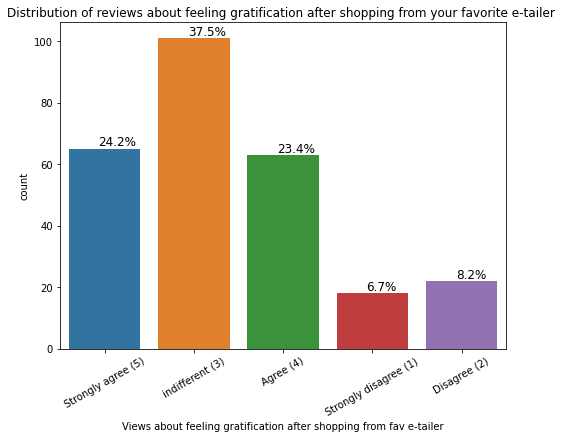

In [115]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['45 You feel gratification shopping on your favorite e-tailer'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about feeling gratification after shopping from your favorite e-tailer ')
plt.xlabel('Views about feeling gratification after shopping from fav e-tailer')
plt.xticks(rotation='30')
plt.show()

We observe from our dataset that 38% of people feel indifferent about gratified after shopping from favorite e-tailers. However, 24% people strongly agree and 23% people simply agree that they feel gratification after shopping from fav e-tailers.

In [116]:
list_cols[45]

'46 Shopping on the website helps you fulfill certain roles'

#### 46. Shopping on the website helps you fulfill certain roles

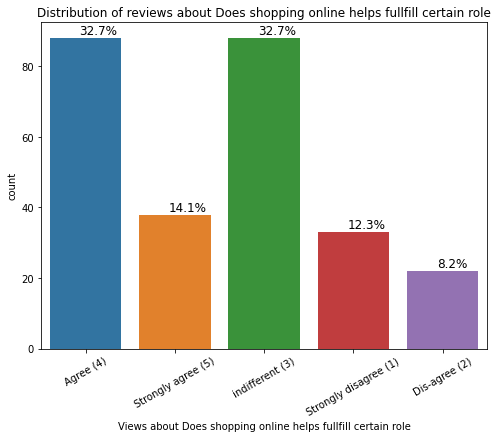

In [117]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['46 Shopping on the website helps you fulfill certain roles'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about Does shopping online helps fullfill certain role')
plt.xlabel('Views about Does shopping online helps fullfill certain role')
plt.xticks(rotation='30')
plt.show()

We observe from our dataset that 33% of people agree that shopping online helps them fulfill certain roles while same %ge of people have indifferent opinions.

In [118]:
list_cols[46]

'47 Getting value for money spent'

#### 47. Getting value for money spent

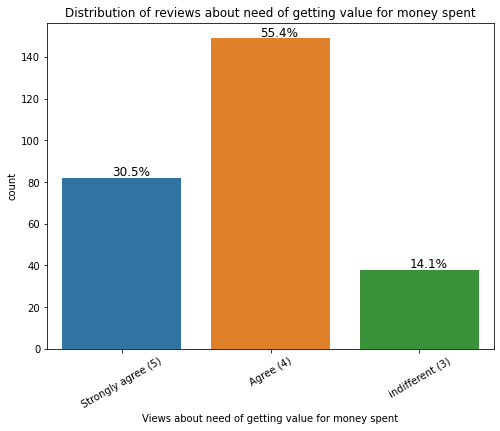

In [119]:
plt.figure(figsize=(8,6))
ax = sn.countplot(df_personal_pref['47 Getting value for money spent'])
without_hue(df_personal_pref)
plt.title('Distribution of reviews about need of getting value for money spent')
plt.xlabel('Views about need of getting value for money spent')
plt.xticks(rotation='30')
plt.show()

We observe from our dataset that 55% people agree that one should get value for money spent and 31% people strongly agree with it.

### EDA with feedback choices of e-tailers

#### Function to append a particular column of user choices dataset to whole user preferences dataset

In [120]:
def create_x_datasets(user_pref_df,choice_feature):
    """ user_pref_df   - dataset of user info and user preferences
        choice_feature - feature from user choices """
    temp_df = user_pref_df.join(df_choices[choice_feature])
    
    return temp_df

#### Function to seperate the target column multiple entries as new records

In [121]:
def sep_multi_values_into_new_records(df,feature_to_split):
    """ df - original dataframe with shopper's preferences as independent features and one of the target feature.
        feature_to_split - target feature which has multiple retailers for some records of user's choices
        """
    temp_df = pd.DataFrame(columns=df.columns)
    for i in range(len(df.index)):
        temp_target_list = df[feature_to_split][i].split(',')
        for tar in temp_target_list:
            new_row = {}
            for col in df.columns:
                if col != feature_to_split:
                    new_row[col] = df[col][i]
                else:
                    # change the target values into all small case and strip whitespaces to avoid repititions
                    new_tar = ''.join(tar.split()).lower()
                    new_row[col] = new_tar
            temp_df = temp_df.append(new_row,ignore_index=True)
    temp_target_list.clear()
    
    return temp_df

### Analyzing Retailers which are most shopped from

##### x1 - user preference dataset joined with 'Most shopped retailers' feature

In [122]:
x1 = create_x_datasets(df_personal_pref,'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ')

In [123]:
x1.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;"
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com"
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Str

In [124]:
x1.iloc[:,-1].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64

We observe many users have chosen multiple retailers as their choice to the question 'Which retailer they have most shopped from?'. We will seperate the grouped retailers as new records.

#### Seperate the multiple inputs and adding them as new records

In [125]:
new_x1 = sep_multi_values_into_new_records(x1,'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ')

In [126]:
print(x1.shape,'\n',new_x1.shape)

(269, 48) 
 (968, 48)


The number of records now has been increased to 968 after seperating multiple values in last column of x1.

In [127]:
new_x1.iloc[:,-1].value_counts()

amazon.in       269
flipkart.com    221
snapdeal.com    182
paytm.com       150
myntra.com      146
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64

In [128]:
new_x1 = new_x1.rename(columns={'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'Online retailers shopped from'})

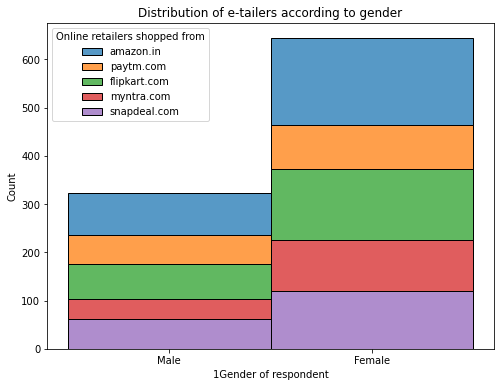

In [129]:
plt.figure(figsize=(8,6))
sn.histplot(binwidth = 0.5, x='1Gender of respondent',hue='Online retailers shopped from', data = new_x1, stat= 'count', multiple='stack',)
plt.title("Distribution of e-tailers according to gender")
plt.show()

We observe that, **Amazon.in** is the most preferred shopping website by users of both genders, followed by **Flipkart.com**. We also observe that **Snapdeal.com** is also famous among users as compared to **Myntra.com and Paytm.com** 

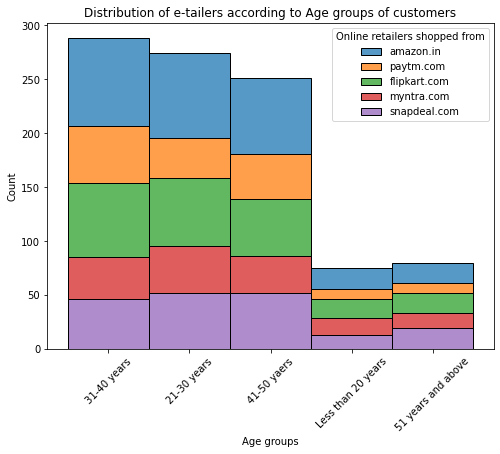

In [130]:
plt.figure(figsize=(8,6))
sn.histplot(binwidth = 0.5, x='2 How old are you? ',hue='Online retailers shopped from', data = new_x1, stat= 'count', multiple='stack',)
plt.title('Distribution of e-tailers according to Age groups of customers')
plt.xlabel('Age groups')
plt.xticks(rotation='45')
plt.show()

We observe that for the adult population between 21-50 years of age Amazon.in and Flipkart.com are more preferred e-tailers. After those e-tailers, we observe Myntra.com and Snapdeal.com are more used for online shopping by adults upto 50 yrs of age. We observe similar preferences of e-tailers by people of age more than 51 yrs and less than 20 yrs.

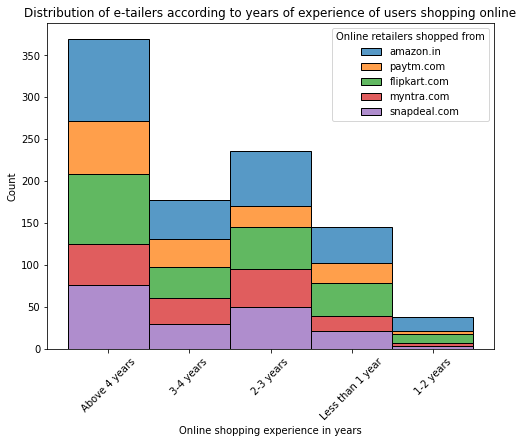

In [131]:
plt.figure(figsize=(8,6))
sn.histplot(binwidth = 0.5, x='5 Since How Long You are Shopping Online ?',hue='Online retailers shopped from', data = new_x1, stat= 'count', multiple='stack',)
plt.title('Distribution of e-tailers according to years of experience of users shopping online')
plt.xlabel('Online shopping experience in years')
plt.xticks(rotation='45')
plt.show()

We observe that, amongst people with more than 4 years of online shopping experience, **Amazon.in** and **Flipkart.com** ae more used followed by **Snapdeal.com** and **Paytm.com**. For the people with shopping experience of 3-4 years, **Amzon.com** is mostly used while other retailers have been used by almost equal number of reviewers. For people with 2-3 years of shopping experience, we observe that **Amazon.in** is most used e-tailer followed by **Flipkart.com** and **Snapdeal.com** & **Myntra.com**. We observe very few users have used **Paytm.com**. For people with shopping experience of less than 1 year, **Amazon.in** & **Flipkart** is the most preferred e-tailer followed by **Paytm.com** and **Snapdeal.com**. For people with 1-2 years of shopping experience, **Amazon.in** is most used, but we have very few records for this category.

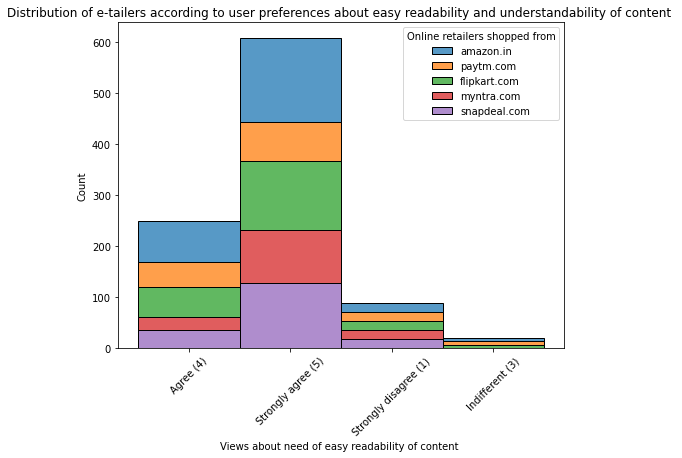

In [132]:
plt.figure(figsize=(8,6))
sn.histplot(binwidth = 0.5, x='18 The content on the website must be easy to read and understand',hue='Online retailers shopped from', data = new_x1, stat= 'count', multiple='stack',)
plt.title('Distribution of e-tailers according to user preferences about easy readability and understandability of content ')
plt.xlabel('Views about need of easy readability of content ')
plt.xticks(rotation='45')
plt.show()

We observe that, people who **Strongly agree** about need of easy to understand and read content while shopping online has mostly used **Amazon.in** for shopping, followed by **Flipkart.com** and **Snapdeal.com** with almost equal number of users. Amongst people who simply **agree** that content should be easy to read and understand, we observe, **Amazon.in** is most preferred followed by **Flipkart.com** and **Paytm.com***.

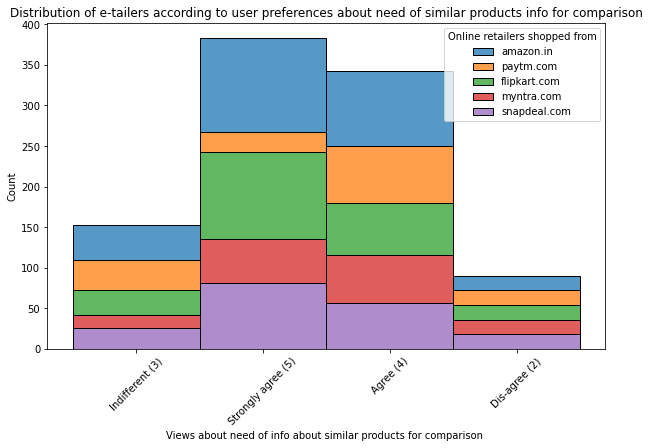

In [133]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='19 Information on similar product to the one highlighted  is important for product comparison',hue='Online retailers shopped from', data = new_x1, stat= 'count', multiple='stack',)
plt.title('Distribution of e-tailers according to user preferences about need of similar products info for comparison')
plt.xlabel('Views about need of info about similar products for comparison ')
plt.xticks(rotation='45')
plt.show()

We observe from our dataset that people who **strongly agree** about having similar products info shown for product comparison mostly shooped from **Amazon.in**  followed by **Flipkart.com** and **Snapdeal.com**. People who have simply **agree** that similar products info is useful for comparison, mostly shopped from **Amazon.in** followed by **Paytm.com**. 

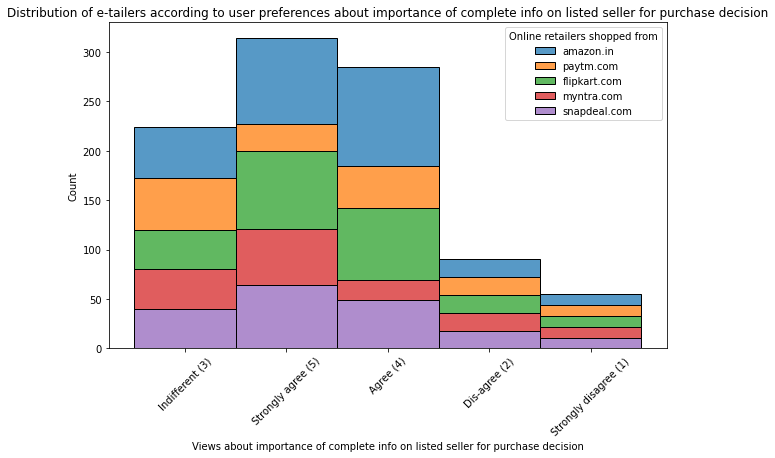

In [134]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='20 Complete information on listed seller and product being offered is important for purchase decision.',hue='Online retailers shopped from', data = new_x1, stat= 'count', multiple='stack',)
plt.title('Distribution of e-tailers according to user preferences about importance of complete info on listed seller for purchase decision')
plt.xlabel('Views about importance of complete info on listed seller for purchase decision')
plt.xticks(rotation='45')
plt.show()

We observe that people who **strongly agree** about complete info on listed seller is important factor of making purchase decision has mostly shopped from **Amazon.in**, **Flipkart.com** and **Snapdeal.com**. However, we see that people who **simply agree** about having listed seller complete info is important factor have mostly shopped from **Amazon.in**, followed by **Flipkart.com**. We also observe that people who feel **indifferent** have shopped mostly from **Paytm.com** and **Amazon.in**.

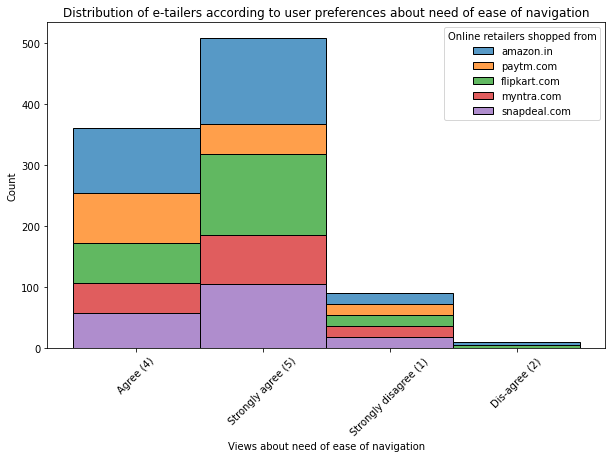

In [135]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='22 Ease of navigation in website',hue='Online retailers shopped from', data = new_x1, stat= 'count', multiple='stack',)
plt.title('Distribution of e-tailers according to user preferences about need of ease of navigation')
plt.xlabel('Views about need of ease of navigation')
plt.xticks(rotation='45')
plt.show()

We observe that, people who **strongly agree** that ease of navigation is important factor while shopping online have mostly shopped from **Amazon.in** and **Flipkart.com**. However, we observe , people who have simply **agree** about importance of ease of navigation for shopping online have mostly shopped from **Amazon.in** and **Paytm.com**

### ANalysing User Choices for Easy to use website or application

In [136]:
x2 = create_x_datasets(df_personal_pref,'Easy to use website or application')

In [137]:
x2.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'Easy to use website or application'],
      dtype='object')

In [138]:
x2.shape

(269, 48)

We now have appended the "Easy to use website or application" feature to user preferences dataset for analysing it.

In [139]:
new_x2 = sep_multi_values_into_new_records(x2,'Easy to use website or application')

In [140]:
new_x2.shape

(852, 48)

We observe that after seperating multiple entries for e-tailer choices, we have 852 records.

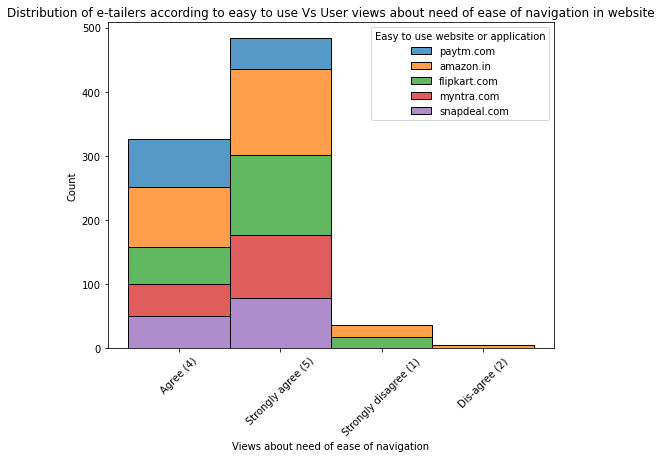

In [141]:
plt.figure(figsize=(8,6))
sn.histplot(binwidth = 0.5, x='22 Ease of navigation in website',hue='Easy to use website or application', data = new_x2, stat= 'count', multiple='stack')
plt.title('Distribution of e-tailers according to easy to use Vs User views about need of ease of navigation in website')
plt.xlabel('Views about need of ease of navigation')
plt.xticks(rotation='45')
plt.show()

We observe that, **Amazon.in** followed by **Flipkart.com** have been selected by most people ,who strongly agree about need of easy to use website interface, for easy to use website & application. However , amongst people who simply **agree** about need of ease in navigation while shopping online , we observe that, **Amazon.in** is most used followed by **Paytm.com**.

# Trial for %ge on barplot with Hue

In [142]:
# choice_order = [i for i in new_x2['22 Ease of navigation in website'].unique()]
# # print(choice_order)
# hue_order = [i for i in new_x2['Easy to use website or application'].unique()]
# # print(hue_order)

# from itertools import product

# bar_order = product(choice_order, hue_order)

# catp = sn.catplot(data=new_x2,kind='count',x='22 Ease of navigation in website',hue='Easy to use website or application',
#                  order = choice_order, hue_order = hue_order)

# spots = zip(catp.ax.patches, bar_order)

# for spot in spots:
#     choice_total = len(new_x2[new_x2['22 Ease of navigation in website']==spot[1][0]])
    
#     choices_etailer_total = len(new_x2[(new_x2['22 Ease of navigation in website']==spot[1][0]) & 
#                                (new_x2['Easy to use website or application']==spot[1][1])])
    
#     height = spot[0].get_height()
#     pdb.set_trace()
#     catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(choices_etailer_total/choice_total))
# # plt.show()

### Analysing the user preferences about loading and processing speed of e-tailer and user choices of e-tailers

In [143]:
x3 = create_x_datasets(df_personal_pref,'Fast loading website speed of website and application')

In [144]:
x3.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'Fast loading website speed of website and application'],
      dtype='object')

Now we have appended the user choices of e-tailers feature to user preferences

In [145]:
new_x3 = sep_multi_values_into_new_records(x3,'Fast loading website speed of website and application')

In [146]:
new_x3.shape

(665, 48)

In [147]:
new_x3 = new_x3.rename(columns={'Fast loading website speed of website and application':'Fast loading site & app'})

In [148]:
new_x3.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent', 'Fast loading site & app'],
      dtype='object')

We now have 665 records of data after seperating multiple entries from 'Fast loading website speed of website and application' feature into new records

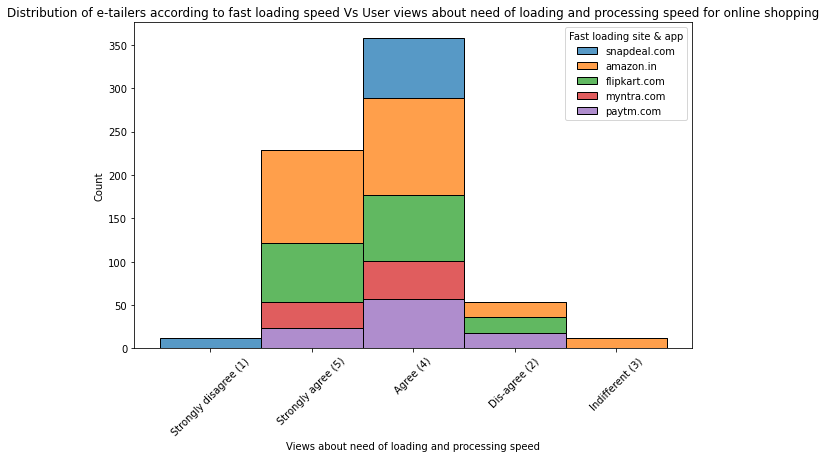

In [149]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='23 Loading and processing speed',hue='Fast loading site & app', data = new_x3, stat= 'count', multiple='stack')
plt.title('Distribution of e-tailers according to fast loading speed Vs User views about need of loading and processing speed for online shopping')
plt.xlabel('Views about need of loading and processing speed')
plt.xticks(rotation='45')
plt.show()

According to people who **strongly agree** and **agree** that, loading and processing speed of e-tailer website is important, have mostly chosen to shop from **Amazon.in** followed by **Flipkart.com**

### Analysing e-tailers as per 'Reliability of the website or application'

In [150]:
x4 = create_x_datasets(df_personal_pref,'Reliability of the website or application')

In [151]:
x4.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'Reliability of the website or application'],
      dtype='object')

We have appended the 'Reliability of the website or application' target feature to user preferences dataset

In [152]:
new_x4 = sep_multi_values_into_new_records(x4,'Reliability of the website or application')

In [153]:
new_x4.shape

(578, 48)

We now have 578 records to find relation between user preferences and importance of 'Reliability of the website or application'

In [154]:
# new_x4 = new_x4.rename(columns={'Reliability of the website or application':''})

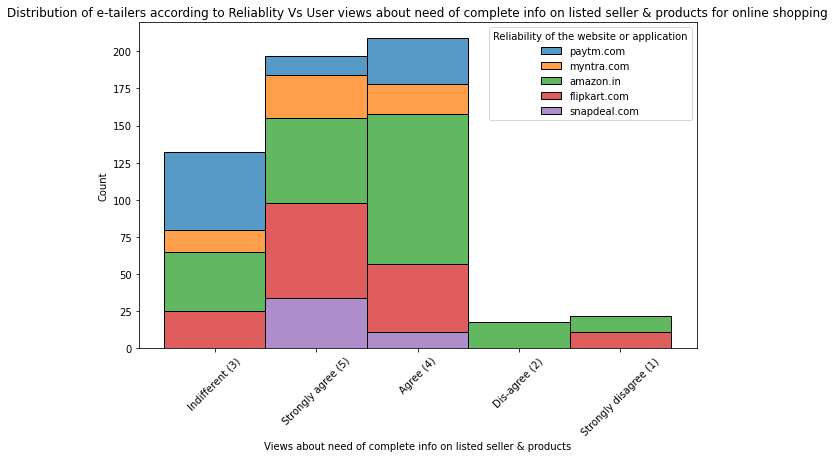

In [155]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='20 Complete information on listed seller and product being offered is important for purchase decision.',hue='Reliability of the website or application', data = new_x4, stat= 'count', multiple='stack')
plt.title('Distribution of e-tailers according to Reliablity Vs User views about need of complete info on listed seller & products for online shopping')
plt.xlabel('Views about need of complete info on listed seller & products')
plt.xticks(rotation='45')
plt.show()

We observe that, people who **strongly agree** that complete info on listed sellers and products is important while shopping online have mostly selected **Amzon.in** and **Flipkart.com** as most reliable e-tailers. The similar observation can be seen amongst people who simply **agree** about importance of listed sellers & products.

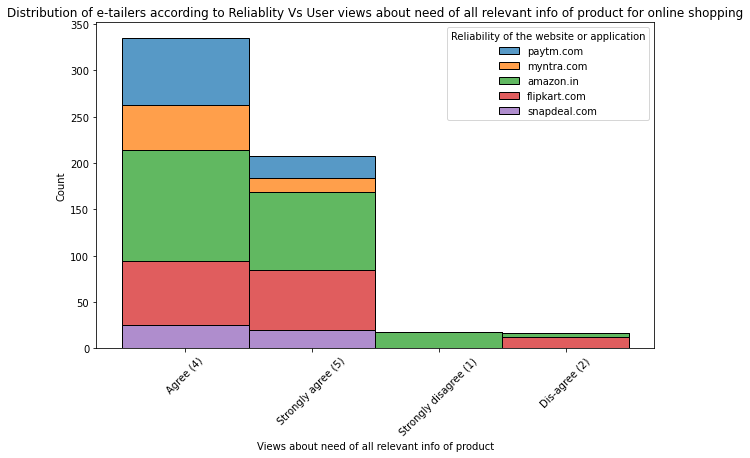

In [156]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='21 All relevant information on listed products must be stated clearly',hue='Reliability of the website or application', data = new_x4, stat= 'count', multiple='stack')
plt.title('Distribution of e-tailers according to Reliablity Vs User views about need of all relevant info of product for online shopping')
plt.xlabel('Views about need of all relevant info of product')
plt.xticks(rotation='45')
plt.show()

We observe that, people who **strongly agree** that all relevant info on listed product is necessary for making shopping decisions have chosen **Amazon.in** followed by **Flipkart.com** as most reliable, however, people who simply **agree** about having relevant product info is necessary have mostly chosen **Amazon.in** followed by **Paytm.com** and **Flipkart.com** as most reliable e=tailers.

### Analyzing e-tailers according to "Quickness to complete purchase"

In [157]:
x5 = create_x_datasets(df_personal_pref,'Quickness to complete purchase')

In [158]:
x5.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent', 'Quickness to complete purchase'],
      dtype='object')

We have appended the 'Quickness to complete purchase' feature to the user preferences dataset.

In [159]:
new_x5 = sep_multi_values_into_new_records(x5,'Quickness to complete purchase')

In [160]:
new_x5.shape

(588, 48)

We now have 588 records after seperating multiple values as new records present in 'Quickness to complete purchase' feature.

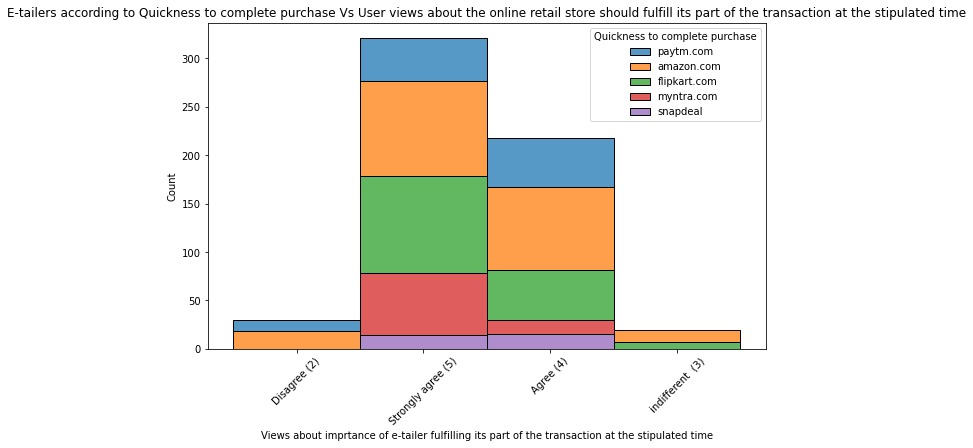

In [161]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',hue='Quickness to complete purchase', data = new_x5, stat= 'count', multiple='stack')
plt.title('E-tailers according to Quickness to complete purchase Vs User views about the online retail store should fulfill its part of the transaction at the stipulated time')
plt.xlabel('Views about imprtance of e-tailer fulfilling its part of the transaction at the stipulated time')
plt.xticks(rotation='45')
plt.show()

We observe that people who **strongly agree** that e-tailer should fulfill it's part of transaction at the stipulated time have chosen **Amazon.in** and **Flipkart.com** as very quick to complete purchases, followed by **myntra.com**.

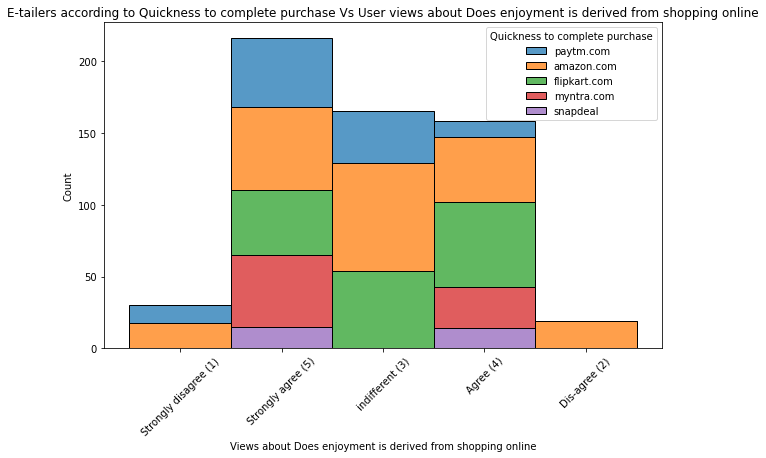

In [162]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='31 Enjoyment is derived from shopping online',hue='Quickness to complete purchase', data = new_x5, stat= 'count', multiple='stack')
plt.title('E-tailers according to Quickness to complete purchase Vs User views about Does enjoyment is derived from shopping online')
plt.xlabel('Views about Does enjoyment is derived from shopping online')
plt.xticks(rotation='45')
plt.show()

We observe that people, who simply ** agree** that enjoyment is derived from shopping online, have mostly chosen **flipkart.com** as most quick to complete a purchase followed by **amazon.in**.

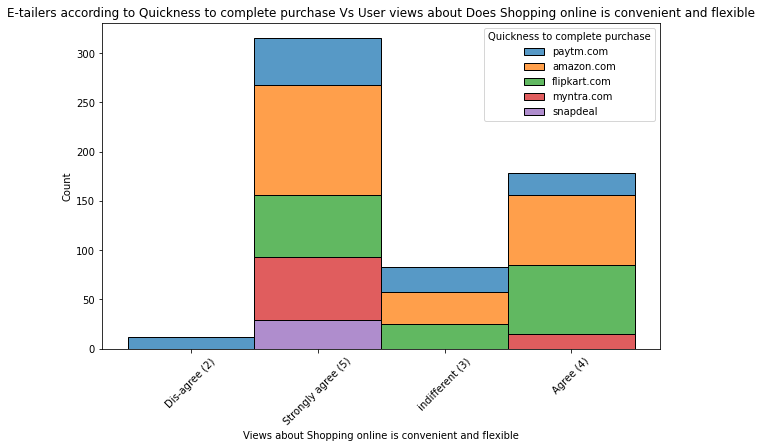

In [163]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='32 Shopping online is convenient and flexible',hue='Quickness to complete purchase', data = new_x5, stat= 'count', multiple='stack')
plt.title('E-tailers according to Quickness to complete purchase Vs User views about Does Shopping online is convenient and flexible')
plt.xlabel('Views about Shopping online is convenient and flexible')
plt.xticks(rotation='45')
plt.show()

We observe that, people, who **strongly agree** that shopping online is convenient and flexible, have mostly chosen **Amazon.in** followed by **myntra.com** then **flipkart.com** as quickest e=tailers to complete a purchase.

### Analyzing the 'Availability of several payment options' feature

In [164]:
x6 = create_x_datasets(df_personal_pref,'Availability of several payment options')

In [165]:
x6.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'Availability of several payment options'],
      dtype='object')

We have now appended the 'Availability of several payment options' feature with user preferences dataset.

In [166]:
new_x6 = sep_multi_values_into_new_records(x6,'Availability of several payment options')

In [167]:
new_x6.shape

(722, 48)

We now have 772 records to analyze 'Availability of several payment options' after seperating multiple inputs as new records

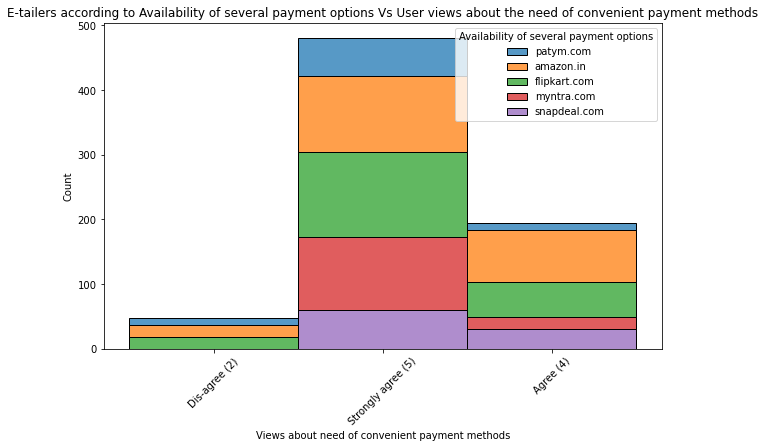

In [168]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='25 Convenient Payment methods',hue='Availability of several payment options', data = new_x6, stat= 'count', multiple='stack')
plt.title('E-tailers according to Availability of several payment options Vs User views about the need of convenient payment methods')
plt.xlabel('Views about need of convenient payment methods')
plt.xticks(rotation='45')
plt.show()

We observe that people, who **strongly agree** about necessity of several payment options, have chosen **Amazon.in, flipkart.com and myntra.com** for having several payment options available for shopping online.

### Analyzing 'Speedy order delivery ' feature

In [169]:
x7 = create_x_datasets(df_personal_pref,'Speedy order delivery ')

In [170]:
x7.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent', 'Speedy order delivery '],
      dtype='object')

We now have appended the 'Speedy order delivery ' feature to the user preference dataset

In [171]:
new_x7 = sep_multi_values_into_new_records(x7,'Speedy order delivery ')

In [172]:
new_x7.shape

(481, 48)

We now have 481 records after seperating multiple inputs in some records as new records from 'Speedy order delivery ' feature.

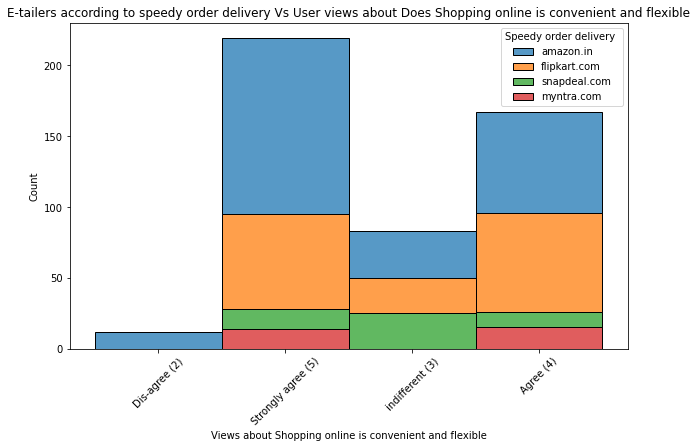

In [173]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='32 Shopping online is convenient and flexible',hue='Speedy order delivery ', data = new_x7, stat= 'count', multiple='stack')
plt.title('E-tailers according to speedy order delivery Vs User views about Does Shopping online is convenient and flexible')
plt.xlabel('Views about Shopping online is convenient and flexible')
plt.xticks(rotation='45')
plt.show()

We observe that most of the people have chosen **Amazon.in** as favorite choice for speedy order deliveries.

### Analyzing 'Privacy of customers’ information' feature

In [174]:
x8 = create_x_datasets(df_personal_pref,'Privacy of customers’ information')

In [175]:
x8.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'Privacy of customers’ information'],
      dtype='object')

We have now appended 'Privacy of customers’ information' feature with user preference dataset.

In [176]:
new_x8 = sep_multi_values_into_new_records(x8,'Privacy of customers’ information')

In [177]:
new_x8.shape

(562, 48)

After seperating multiple inputs from some records and adding them as new features for 'Privacy of customers’ information' feature.

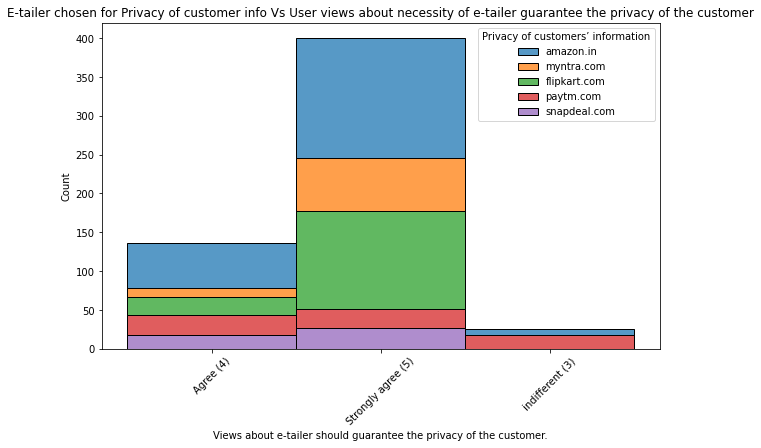

In [178]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='28 Being able to guarantee the privacy of the customer',hue='Privacy of customers’ information', data = new_x8, stat= 'count', multiple='stack')
plt.title('E-tailer chosen for Privacy of customer info Vs User views about necessity of e-tailer guarantee the privacy of the customer')
plt.xlabel('Views about e-tailer should guarantee the privacy of the customer.')
plt.xticks(rotation='45')
plt.show()

We observe that people, who **strongly agree** that e-tailer should guarantee the privacy of the customer, have mostly chosen **Amazon.in** and **Flipkart.com** followed by **myntra.com** as the trusted site for privacy of customer's information.

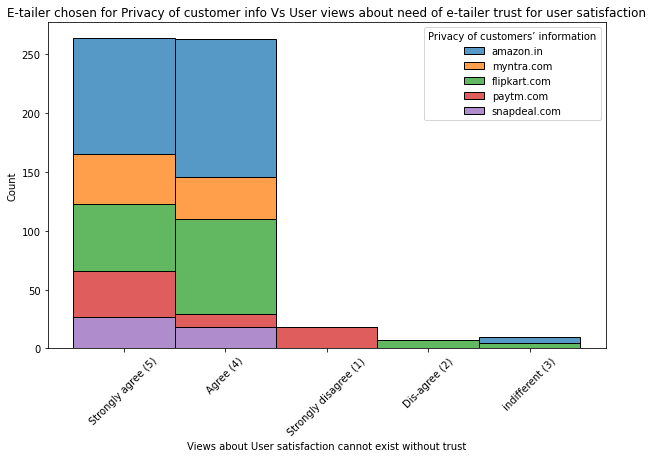

In [179]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='38 User satisfaction cannot exist without trust',hue='Privacy of customers’ information', data = new_x8, stat= 'count', multiple='stack')
plt.title('E-tailer chosen for Privacy of customer info Vs User views about need of e-tailer trust for user satisfaction')
plt.xlabel('Views about User satisfaction cannot exist without trust')
plt.xticks(rotation='45')
plt.show()

We observe that, people who **strongly agree** that User satisfaction cannot exist without trust, have chosen **Amazon.in** as most reliable for privacy of customers info, followed by **flipkart.com**, **myntra.com** and **paytm.com** respectively.

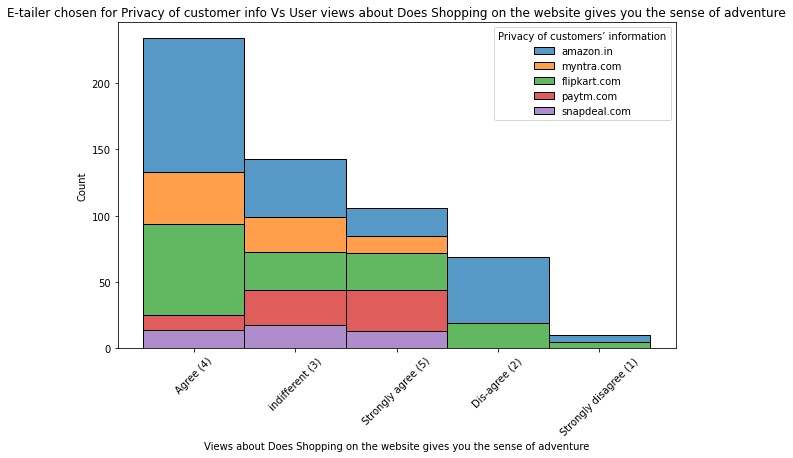

In [180]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='43 Shopping on the website gives you the sense of adventure',hue='Privacy of customers’ information', data = new_x8, stat= 'count', multiple='stack')
plt.title('E-tailer chosen for Privacy of customer info Vs User views about Does Shopping on the website gives you the sense of adventure')
plt.xlabel('Views about Does Shopping on the website gives you the sense of adventure')
plt.xticks(rotation='45')
plt.show()

We observe that, people who **strongly agree** that Shopping online gives sense of adventure, have mostly chosen **Paytm.com** and **Flipkart.com** as most reliable for privacy of customers info. However, we observe that people, who have simply **agreed** that shopping online gives sense of adventure, have mostly chosen **Amazon.in**, followed by **Flipkart.com** as most reliable for privacy of customer info.

### Analyzing 'Security of customer financial information' feature

In [181]:
x9 = create_x_datasets(df_personal_pref,'Security of customer financial information')

In [182]:
x9.columns[-3:]

Index(['46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'Security of customer financial information'],
      dtype='object')

We now have appended the 'Security of customer financial information' feature to user preferences dataset

In [183]:
new_x9 = sep_multi_values_into_new_records(x9,'Security of customer financial information')

In [184]:
new_x9.shape

(634, 48)

After seperating multiple input choices of e-tailers in few records and adding it as new records, we have 634 records.

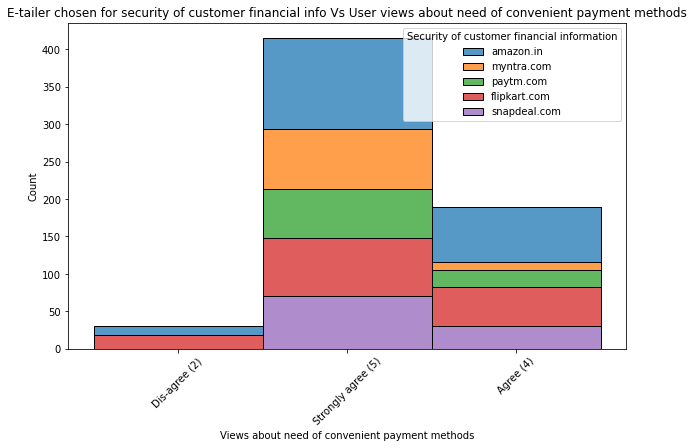

In [187]:
plt.figure(figsize=(10,6))
sn.histplot(binwidth = 0.5, x='25 Convenient Payment methods',hue='Security of customer financial information', data = new_x9, stat= 'count', multiple='stack')
plt.title('E-tailer chosen for security of customer financial info Vs User views about need of convenient payment methods')
plt.xlabel('Views about need of convenient payment methods')
plt.xticks(rotation='45')
plt.show()

We observe that , people who **strongly agree** about need of convenient payment methods, have mostly chosen **Amazon.com** as most secure for customer financial info

Security of customer financial information

25 Convenient Payment methods
28 Being able to guarantee the privacy of the customer


In [ ]:
Privacy of customers’ information

28 Being able to guarantee the privacy of the customer
38 User satisfaction cannot exist without trust
43 Shopping on the website gives you the sense of adventure

In [ ]:
Quickness to complete purchase

26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time
31 Enjoyment is derived from shopping online
32 Shopping online is convenient and flexible

In [188]:
df_personal_pref.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [189]:
df_choices.columns

Index(['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
    

# On friday summarize the EDA and then only submit